# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

In [167]:
#libraries
import seaborn as sns
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot as plt
from matplotlib import cm

In [168]:
#visualization options
%matplotlib inline
%config Inlinebackend.figure_format = 'retina'

sns.set_context("poster")
sns.set(rc={"figure.figsize": (9.,6.)})
sns.set_style("whitegrid")
sns.set_palette("pastel");

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'X': [x_values], 'Y': [y_values]})
~~~~

In [169]:
student_data = pd.DataFrame({'Age': [17,51,27,21,36,48,19,26,54,30], 'Tardies': [10,1,5,9,4,2,9,6,0,3]})
student_data

,Age,Tardies
0,17,10
1,51,1
2,27,5
3,21,9
4,36,4
5,48,2
6,19,9
7,26,6
8,54,0
9,30,3


Draw a dispersion diagram (scatter plot) for the data.

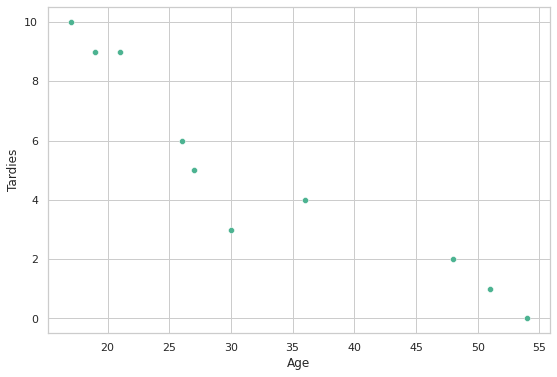

In [170]:
sns.scatterplot(x = "Age", y = "Tardies", data = student_data, color = "#4CB391");

Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

In [171]:
# cuanto más mayor es sel alumno, más posiblidades de llegar tarde

Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [172]:
cov = pd.DataFrame(np.cov(student_data["Age"],student_data["Tardies"]))
cov

,0,1
0,187.655556,-45.566667
1,-45.566667,12.544444


In [173]:
corr = student_data.corr()
corr

,Age,Tardies
Age,1.000000,-0.939163
Tardies,-0.939163,1.000000


- En la correlación podemos observar que la variable x (Edad) influye mucho en la puntualidad de la persona. 
- En este caso es inversamente proporcional(correlación negativa), cuanto más joven es la persona más veces llega tarde.

Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [174]:
lr = LinearRegression()
lr.fit(
    X = student_data[["Age"]], #predictivo
    y = student_data.Tardies #objetivo
)

LinearRegression()

In [175]:
beta_1 = lr.coef_[0]
beta_0 = lr.intercept_
print(beta_0, beta_1)

12.888803363135768 -0.2428207709159808


In [176]:
student_data["pred"] = round((student_data.Age * lr.coef_[0]) + lr.intercept_,2)
student_data

,Age,Tardies,pred
0,17,10,8.76
1,51,1,0.50
2,27,5,6.33
3,21,9,7.79
4,36,4,4.15
5,48,2,1.23
6,19,9,8.28
7,26,6,6.58
8,54,0,-0.22
9,30,3,5.60


In [177]:
# outcome variable = retrasos (en función de la edad.)
# Simple linear regression


Plot your regression model on your scatter plot.

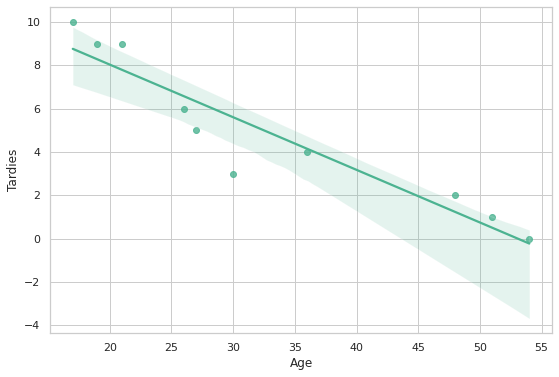

In [178]:
sns.regplot(x="Age", y="Tardies", data=student_data, color = "#4CB391");

Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

In [179]:
results = smf.ols("Tardies ~ Age", data = student_data).fit()
results.summary()

/home/sinatxe/anaconda3/envs/ironhack/lib/python3.8/site-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Tardies   R-squared:                       0.882
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     59.81
Date:                Tue, 23 Nov 2021   Prob (F-statistic):           5.57e-05
Time:                        23:38:45   Log-Likelihood:                -15.622
No. Observations:                  10   AIC:                             35.24
Df Residuals:                       8   BIC:                             35.85
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     12.8888      1.111     11.605      0.000      10.328      15.450
Age           -0.2428      0.031     -7.734      0.000      -0.315      -0.170
==============================================================================
Omnibus:                        3.949   Durbin-Watson:                   1.754
Prob(Omnibus):                  0.139   Jarque-Bera (JB):                1.714
Skew:                          -1.014   Prob(JB):                        0.424
Kurtosis:                       3.069   Cond. No.                         96.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [180]:
# P value is less than 0.05 so we can reject the null hypothesi
# R-square is 0.88, the closer to 1 the etter is our regresion model

## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [181]:
veh = pd.read_csv("vehicles.csv")
veh.sample(2)

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
2269,BMW,550i,2009,4.8,8.0,Manual 6-spd,Rear-Wheel Drive,Midsize Cars,Premium,18.311667,15,22,18,493.722222,2250
25019,Mercury,Tracer,1996,1.8,4.0,Manual 5-spd,Front-Wheel Drive,Compact Cars,Regular,13.733750,22,28,24,370.291667,1400


Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

In [182]:
veh_cor = veh[["Year","Cylinders", "Fuel Barrels/Year", "Combined MPG","Fuel Cost/Year","CO2 Emission Grams/Mile"]]
veh_cor.corr()

,Year,Cylinders,Fuel Barrels/Year,Combined MPG,Fuel Cost/Year,CO2 Emission Grams/Mile
Year,1.000000,0.082469,-0.221084,0.204751,-0.091913,-0.222300
Cylinders,0.082469,1.000000,0.739517,-0.698648,0.778153,0.752393
Fuel Barrels/Year,-0.221084,0.739517,1.000000,-0.909743,0.916208,0.986189
Combined MPG,0.204751,-0.698648,-0.909743,1.000000,-0.875185,-0.926229
Fuel Cost/Year,-0.091913,0.778153,0.916208,-0.875185,1.000000,0.930865
CO2 Emission Grams/Mile,-0.222300,0.752393,0.986189,-0.926229,0.930865,1.000000


In [183]:
#most importants = Fuel Barrels/Year + Combined MPG and Fuel Cost/Year
#least amount of helpful information = Year.

Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

In [184]:
#we only use the 3 most importants variables
#X = veh_cor[["Year","Cylinders", "Fuel Barrels/Year", "Combined MPG","Fuel Cost/Year"]]
X = veh_cor[["Fuel Barrels/Year","Combined MPG","Fuel Cost/Year"]]
y = veh_cor["CO2 Emission Grams/Mile"]

In [185]:
lr.fit(X,y)
veh_cor["pred"] = lr.predict(X)

<ipython-input-185-420142f24fa6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  veh_cor["pred"] = lr.predict(X)


In [186]:
veh_cor.head(3)

,Year,Cylinders,Fuel Barrels/Year,Combined MPG,Fuel Cost/Year,CO2 Emission Grams/Mile,pred
0,1984,4.0,19.388824,17,1950,522.764706,521.461524
1,1984,6.0,25.354615,13,2550,683.615385,670.621392
2,1985,4.0,20.600625,16,2100,555.437500,553.243725


Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

In [187]:
veh.rename({"Fuel Barrels/Year":"Fuel_Barrels_Year","CO2 Emission Grams/Mile":"CO2_Emission_Grams_Mile","Fuel Cost/Year":"Fuel_Cost_Year","Combined MPG":"Combined_MPG"}, axis = 1, inplace = True)

In [188]:
results = smf.ols("CO2_Emission_Grams_Mile ~ Year + Cylinders + Fuel_Barrels_Year + Combined_MPG + Fuel_Barrels_Year + Fuel_Cost_Year", data = veh).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     CO2_Emission_Grams_Mile   R-squared:                       0.981
Model:                                 OLS   Adj. R-squared:                  0.981
Method:                      Least Squares   F-statistic:                 3.687e+05
Date:                     Tue, 23 Nov 2021   Prob (F-statistic):               0.00
Time:                             23:38:50   Log-Likelihood:            -1.5173e+05
No. Observations:                    35952   AIC:                         3.035e+05
Df Residuals:                        35946   BIC:                         3.035e+05
Df Model:                                5                                         
Covariance Type:                 nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept           769.8883     19.392     39.702      0.000     731.880     807.897
Year                 -0.3206      0.010    -33.060      0.000      -0.340      -0.302
Cylinders             1.8788      0.083     22.598      0.000       1.716       2.042
Fuel_Barrels_Year    19.0529      0.061    311.600      0.000      18.933      19.173
Combined_MPG         -3.0404      0.042    -71.645      0.000      -3.124      -2.957
Fuel_Cost_Year        0.0323      0.000     67.025      0.000       0.031       0.033
==============================================================================
Omnibus:                    71055.645   Durbin-Watson:                   0.747
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        246941260.782
Skew:                          15.902   Prob(JB):                         0.00
Kurtosis:                     407.766   Cond. No.                     6.20e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.2e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [189]:
# combining all variables make really confident the model (R-squared = 0.981)

## Bonus Challenge: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [190]:
parties = pd.DataFrame({'Invited': [1,3,4,6,8,9,11,14], 'Attended': [1,2,4,4,5,7,8,13]})
parties

,Invited,Attended
0,1,1
1,3,2
2,4,4
3,6,4
4,8,5
5,9,7
6,11,8
7,14,13


Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

In [216]:
lrp = LinearRegression()
X = parties[["Invited"]]
y = parties.Attended
lrp.fit(X,y)
parties["pred"] = lrp.predict(X)
beta_1p = lrp.coef_[0]
beta_0p = lrp.intercept_

In [223]:
parties

,Invited,Attended,pred
0,1,1,0.409091
1,3,2,2.106061
2,4,4,2.954545
3,6,4,4.651515
4,8,5,6.348485
5,9,7,7.196970
6,11,8,8.893939
7,14,13,11.439394


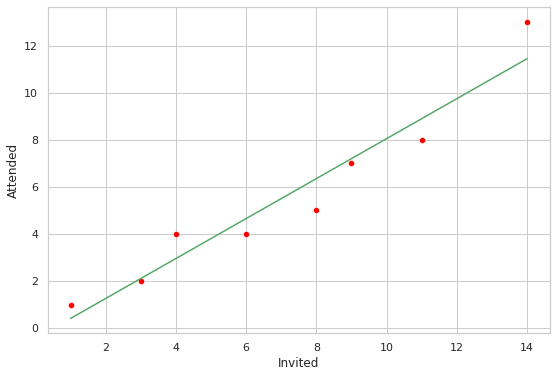

In [217]:
sns.scatterplot(x = "Invited", y = "Attended", data = parties, color = "Red")
plt.plot(parties["Invited"],parties["pred"] , color='g');

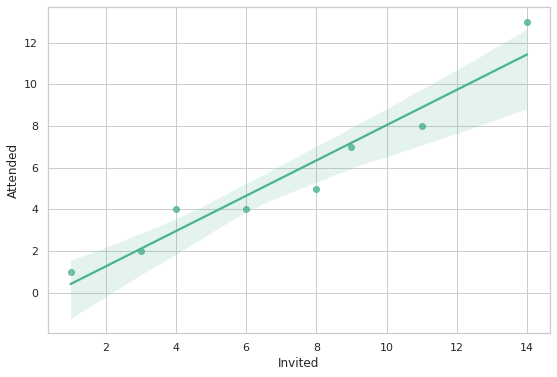

In [218]:
sns.regplot(x = "Invited", y = "Attended", data = parties, color = "#4CB391");

What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

In [219]:
#the more people you invite the more people attends.
beta_1p,beta_0p  



(0.8484848484848485, -0.43939393939393945)

Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

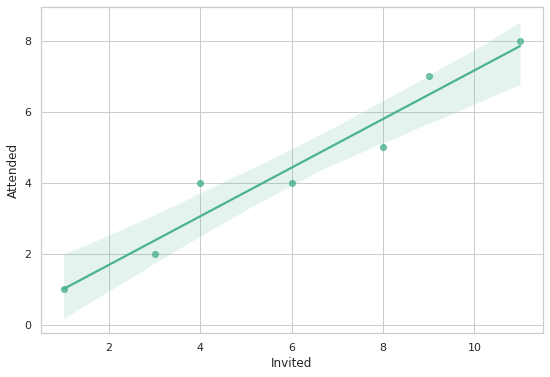

In [220]:
parties_no_out = parties.drop(7, axis = 0)
parties_no_out
sns.regplot(x = "Invited", y = "Attended", data = parties_no_out, color = "#4CB391");

In [222]:
X = parties_no_out[["Invited"]]
y = parties_no_out.Attended
lrp.fit(X,y)
parties_no_out["pred"] = lrp.predict(X)
parties_no_out

,Invited,Attended,pred
0,1,1,1.007519
1,3,2,2.375940
2,4,4,3.060150
3,6,4,4.428571
4,8,5,5.796992
5,9,7,6.481203
6,11,8,7.849624


What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

In [21]:
#the predictions are closer to the objetive variable